# DECOUPLER ANALYSIS OF PATHWAYS AND TF

In [1]:
import scanpy as sc
import decoupler as dc
import numpy as np
from warnings import filterwarnings

filterwarnings("ignore")

In [3]:
adata = sc.read_h5ad("./Data/Peng_annotated.h5ad")
adata

AnnData object with n_obs × n_vars = 49966 × 2000
    obs: 'cell_name', 'Sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'doublet', '_scvi_batch', '_scvi_labels', 'leiden', 'cell_type_prediction', 'cell_type_prediction_probability', 'per_cluster_celltype', 'per_cluster_proportion', 'Condition'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_prediction_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'per_cluster_celltype_colors', 'um

In [4]:
adata = adata[adata.obs.per_cluster_celltype.isin(["Ductal cell","Malign Ductal cell"]),:]
adata

View of AnnData object with n_obs × n_vars = 19202 × 2000
    obs: 'cell_name', 'Sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'doublet', '_scvi_batch', '_scvi_labels', 'leiden', 'cell_type_prediction', 'cell_type_prediction_probability', 'per_cluster_celltype', 'per_cluster_proportion', 'Condition'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_prediction_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap

In [ ]:
progeny = dc.get_progeny(organism='human', top=1000)
progeny

  File "/home/victor/miniconda3/envs/sc_rnaseq/lib/python3.9/site-packages/urllib3/connectionpool.py", line 403, in _make_request
    self._validate_conn(conn)
  File "/home/victor/miniconda3/envs/sc_rnaseq/lib/python3.9/site-packages/urllib3/connectionpool.py", line 1053, in _validate_conn
    conn.connect()
  File "/home/victor/miniconda3/envs/sc_rnaseq/lib/python3.9/site-packages/urllib3/connection.py", line 419, in connect
    self.sock = ssl_wrap_socket(
  File "/home/victor/miniconda3/envs/sc_rnaseq/lib/python3.9/site-packages/urllib3/util/ssl_.py", line 449, in ssl_wrap_socket
    ssl_sock = _ssl_wrap_socket_impl(
  File "/home/victor/miniconda3/envs/sc_rnaseq/lib/python3.9/site-packages/urllib3/util/ssl_.py", line 493, in _ssl_wrap_socket_impl
    return ssl_context.wrap_socket(sock, server_hostname=server_hostname)
  File "/home/victor/miniconda3/envs/sc_rnaseq/lib/python3.9/ssl.py", line 501, in wrap_socket
    return self.sslsocket_class._create(
  File "/home/victor/minicon

,source,target,weight,p_value
0,Androgen,TMPRSS2,11.490631,0.000000e+00
1,Androgen,NKX3-1,10.622551,2.242078e-44
2,Androgen,MBOAT2,10.472733,4.624285e-44
3,Androgen,KLK2,10.176186,1.944414e-40
4,Androgen,SARG,11.386852,2.790209e-40
...,...,...,...,...
13995,p53,PABPC4,-2.282467,6.623818e-05
13996,p53,SF3B3,-1.615436,6.641896e-05
13997,p53,RNF26,-2.288269,6.643224e-05
13998,p53,RABL6,-1.156483,6.697673e-05


In [ ]:
dc.run_mlm(
    mat=adata,
    net=progeny,
    source='source',
    target='target',
    weight='weight',
    verbose=True
)

923 features of mat are empty, they will be removed.
Running mlm on mat with 19202 samples and 23082 targets for 14 sources.


In [ ]:
acts = dc.get_acts(adata, obsm_key='mlm_estimate')

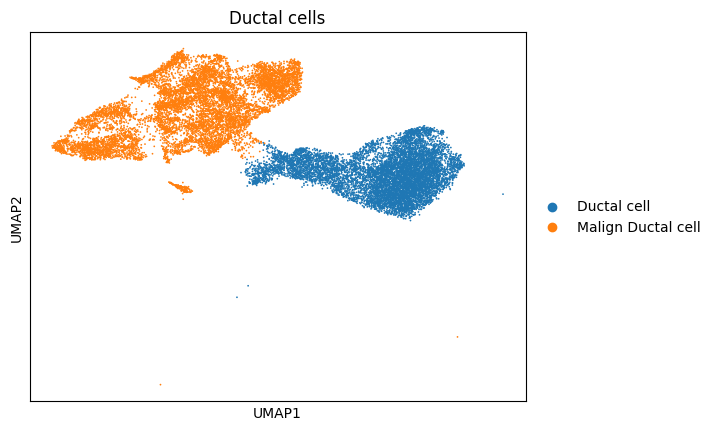

In [ ]:
sc.pl.umap(acts, color="per_cluster_celltype", title = "Ductal cells",cmap='RdBu_r')


In [ ]:
# List of the pathways we want to check
keys = ['EGFR',
        'Hypoxia',
        'JAK-STAT',
        'MAPK',
        'PI3K',
        'TGFb',
        'TNFa',
        'VEGF']

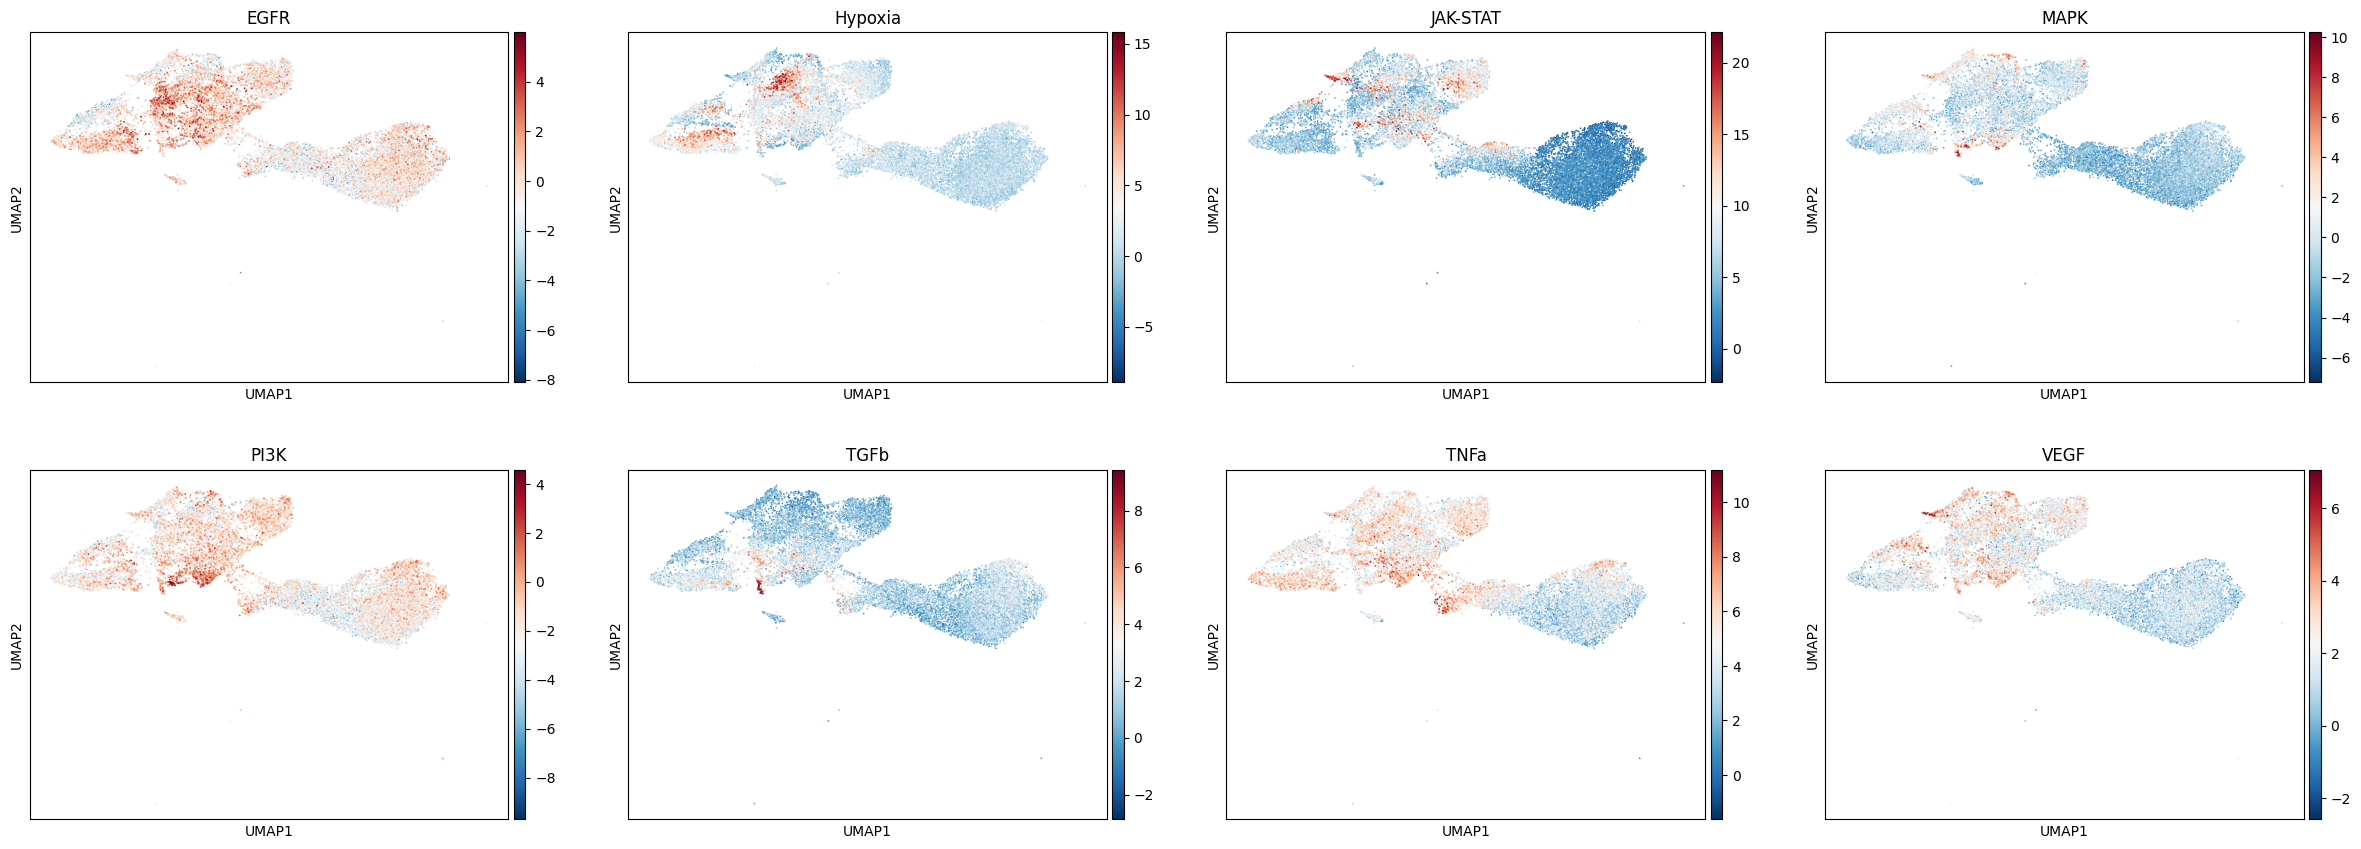

In [ ]:
sc.pl.umap(acts, color=keys, cmap="RdBu_r")

**Now we will perform the TF activity prediction**

In [5]:
# Get the TF a priori info
net = dc.get_collectri(organism='human', split_complexes=False)
net

,source,target,weight,PMID
0,MYC,TERT,1,10022128;10491298;10606235;10637317;10723141;1...
1,SPI1,BGLAP,1,10022617
2,SMAD3,JUN,1,10022869;12374795
3,SMAD4,JUN,1,10022869;12374795
4,STAT5A,IL2,1,10022878;11435608;17182565;17911616;22854263;2...
...,...,...,...,...
43173,NFKB,hsa-miR-143-3p,1,19472311
43174,AP1,hsa-miR-206,1,19721712
43175,NFKB,hsa-miR-21-5p,1,20813833;22387281
43176,NFKB,hsa-miR-224-5p,1,23474441;23988648


**If dc.get_collectri(organism='human', split_complexes=False) gives a ValueError:**

--> pip install --upgrade 'git+https://github.com/saezlab/omnipath.git'

In [7]:
# Perform the univariant linear model
dc.run_ulm(
    mat=adata,
    net=net,
    source='source',
    target='target',
    weight='weight',
    verbose=True
)


Running ulm on mat with 19202 samples and 2000 targets for 446 sources.


In [8]:
# Extract the resultant activities to a new adata

acts_TF = dc.get_acts(adata, obsm_key='ulm_estimate') 
acts_TF

AnnData object with n_obs × n_vars = 19202 × 446
    obs: 'cell_name', 'Sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'doublet', '_scvi_batch', '_scvi_labels', 'leiden', 'cell_type_prediction', 'cell_type_prediction_probability', 'per_cluster_celltype', 'per_cluster_proportion', 'Condition'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_prediction_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs', 'ulm_estimate', 'ulm_pvals'

In [30]:
# Create a dataframe that contains only positive values
df_acts = acts_TF.to_df()

min_val = df_acts.min().min() 
print(min_val)
# min_val is a negative number so this is adding it to all the values in the dataframe
df_acts = df_acts-min_val 
df_acts

-8.975869


,ABL1,AEBP1,AHR,AHRR,AIP,AIRE,AP1,APEX1,AR,ARID1A,...,ZNF384,ZNF395,ZNF410,ZNF423,ZNF436,ZNF699,ZNF76,ZNF804A,ZNF91,ZXDC
T1_AACACGTCAATGACCT,10.635307,8.558909,11.056452,7.307287,9.261024,11.135262,17.121935,9.890079,15.073359,10.739596,...,10.729406,8.153482,8.722130,8.280868,8.153483,10.191015,8.623484,7.501113,13.558288,9.721698
T1_AACCATGCACAACTGT,9.922520,8.659369,9.911928,8.870377,7.310682,12.166181,14.441958,10.412810,15.042559,10.018288,...,11.788271,10.018219,10.583109,8.448320,10.018223,8.554252,8.708385,7.283238,12.952411,10.198105
T1_AACCATGTCTGATTCT,10.071303,7.187610,9.244640,10.144436,8.167181,10.816708,16.656944,11.286748,17.378353,10.136580,...,9.324606,8.999935,9.921103,8.095943,10.065211,10.327332,8.529723,7.587003,12.415184,10.570998
T1_AACCATGTCTGTCCGT,9.950435,6.755671,10.591443,8.865071,5.741726,12.900905,15.411274,9.543691,15.204970,11.511728,...,8.926283,9.915747,8.773578,8.421789,9.915749,10.830705,10.290212,8.662473,12.112026,10.217091
T1_AACCGCGGTACTCGCG,10.375218,10.046670,10.499866,7.388931,9.340049,12.335724,15.256077,11.808060,17.344374,8.091835,...,10.495848,8.091880,10.015390,8.228807,10.591064,9.367482,7.382070,7.479191,11.588282,11.203040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N11_TTTCCTCGTAAGCACG,9.853110,8.630706,10.369998,8.860823,9.396003,15.235112,13.868048,10.728829,14.742761,9.827872,...,10.592150,8.295090,8.765821,8.400543,9.827817,10.049482,8.684161,8.650456,9.948733,8.345582
N11_TTTCCTCGTCGCTTCT,10.612843,8.550949,10.719363,8.834240,8.115984,11.537691,13.624804,10.456716,16.475338,9.480406,...,8.515390,8.137782,11.471548,8.267600,8.137783,9.624475,8.616756,8.575262,12.242816,12.405509
N11_TTTGCGCAGCTAACAA,13.187689,8.685313,12.191300,8.879025,9.329533,17.534147,12.714561,9.238548,15.877323,8.402771,...,10.103158,8.402796,10.742072,8.491569,8.402798,8.116582,8.730312,8.701942,10.529148,10.492546
N11_TTTGCGCCATAGACTC,10.774763,8.375125,10.222711,7.639412,9.707099,14.016319,13.900258,11.736984,16.973669,11.633356,...,8.946033,7.790987,8.610289,7.974522,9.711919,9.885796,8.468162,9.212937,10.761128,11.074453


In [61]:
# Calculate the log fold change of the TF activity between tumoral and non tumoral cells

ind_T = acts_TF.obs[acts_TF.obs.per_cluster_celltype=='Malign Ductal cell'].index 
ind_NT = acts_TF.obs[acts_TF.obs.per_cluster_celltype!='Malign Ductal cell'].index

means_T = df_acts.loc[ind_T].mean()
means_NT = df_acts.loc[ind_NT].mean()

lfc = np.log2(means_T/means_NT).dropna().sort_values(ascending=False)

In [60]:
# Extract the p-values for the calculated TF activitys
acts_TF_p = dc.get_acts(adata, obsm_key='ulm_pvals') 

pval = acts_TF_p.to_df().median() # Obtain the median p-value

In [33]:
# Consider significative those TF whose median-p_value is lower than 0.05
significative_TF = lfc.index.intersection(pval[pval<0.05].index) 

# Filter out the non significative genes and sort the rest by log fold changes 
lfc = lfc[significative_TF]
sorted_lfc = lfc.sort_values(ascending=False)

In [41]:
print(sorted_lfc[:20].index.tolist())

['STAT1', 'RELA', 'NFKB', 'STAT3', 'NFKB1', 'SP1', 'KLF17', 'JUN', 'TP63', 'ETS1', 'AP1', 'HIF1A', 'REL', 'FOS', 'ATF6', 'FOXO3', 'ELK1', 'ATF4', 'GATA1', 'NFE2L2']


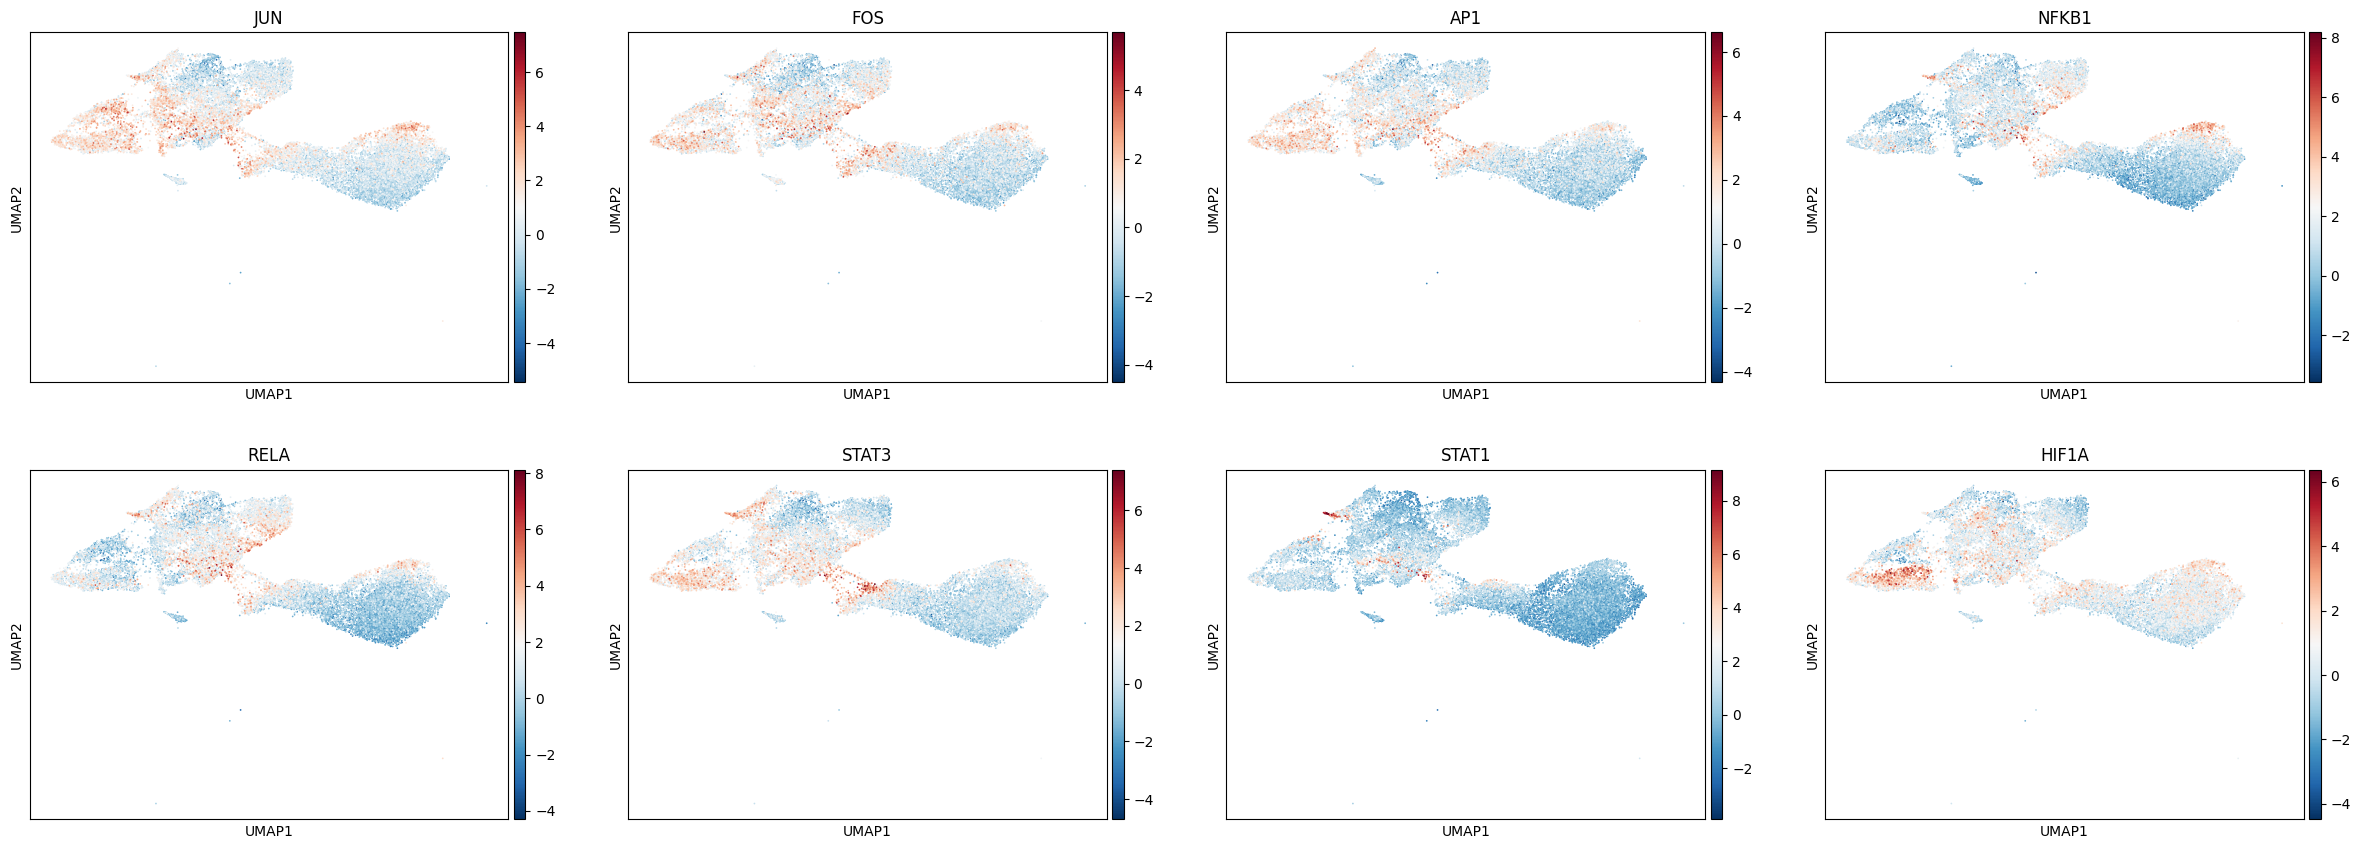

In [9]:
sc.pl.umap(acts_TF, color=["JUN","FOS","AP1","NFKB1","RELA","STAT3","STAT1","ETS1"], cmap='RdBu_r') # SHOW SOME OF THE MOST ACTIVE TF